In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [48]:
df = pd.read_csv(r'C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\SVM_Numerical\HR_comma_sep.csv')

In [49]:
print(df.columns)
df.info()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memo

In [50]:
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.44,0.57,2,141,3,0,1,0,product_mng,medium
1,0.55,0.96,3,194,3,0,0,0,product_mng,medium
2,0.72,0.67,5,210,2,0,0,0,management,medium
3,0.96,0.75,4,177,2,0,0,0,IT,low
4,0.96,0.54,3,198,3,0,0,0,support,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.52,0.57,3,270,3,0,0,0,RandD,low
14995,0.59,0.79,4,209,2,0,0,0,technical,medium
14996,0.69,0.94,5,259,2,0,0,0,IT,medium
14997,0.78,0.59,5,236,3,0,0,0,technical,high


In [51]:
print(df['salary'].unique())
print(df['Department'].unique())

['medium' 'low' 'high']
['product_mng' 'management' 'IT' 'support' 'marketing' 'technical' 'sales'
 'accounting' 'RandD' 'hr']


In [52]:
df = df.replace({'salary' :{'low':0,'medium':1,'high':2}})

In [53]:
print(df['salary'].unique())

[1 0 2]


In [54]:
df = pd.get_dummies(df, drop_first=False)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.44,0.57,2,141,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.55,0.96,3,194,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0.72,0.67,5,210,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.96,0.75,4,177,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.96,0.54,3,198,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.52,0.57,3,270,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14995,0.59,0.79,4,209,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1
14996,0.69,0.94,5,259,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0
14997,0.78,0.59,5,236,3,0,0,0,2,0,0,0,0,0,0,0,0,0,1


In [55]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

In [56]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'left']

In [57]:
df = df[cols]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left
0,0.44,0.57,2,141,3,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,0.55,0.96,3,194,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0.72,0.67,5,210,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0.96,0.75,4,177,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.96,0.54,3,198,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
corrM = df.corr()
corrM

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.050022,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,-0.013002,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,-0.001803,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002242,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.048715,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.009247,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.098119,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.061788
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,1.000000,-0.010959,0.002800,0.012759,0.004599,0.156665,0.011599,-0.007669,-0.035599,-0.029888,-0.018630,-0.157898
Department_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.038942,-0.010959,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.010925
Department_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,0.021268,0.002800,-0.070240,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.046596


<AxesSubplot:>

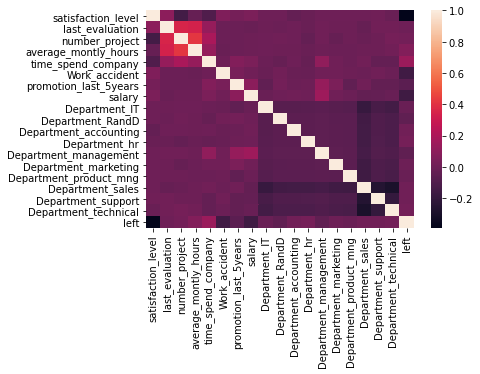

In [59]:
sns.heatmap(corrM, annot=False)

In [63]:
feature= df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical']]
X=np.asarray(feature)
y=np.asarray(df['left'])

In [64]:
print(sampled_df.columns)
sampled_df.info()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'left'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7142 entries, 0 to 7141
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      7142 non-null   float64
 1   last_evaluation         7142 non-null   float64
 2   number_project          7142 non-null   int64  
 3   average_montly_hours    7142 non-null   int64  
 4   time_spend_company      7142 non-null   int64  
 5   Work_accident           7142 non-null   int64  
 6   promotion_last

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(11999, 18)
(11999,)
(3000, 18)
(3000,)


In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
print(set(y_train))
print(set(y_test))

{0, 1}
{0, 1}


In [72]:
model = tf.keras.Sequential()
model.add(Dense(250, input_dim=18, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
#checkpoint to hold the best weights found yet
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)
#here we train the model
historic = model.fit(X_train, y_train, validation_split=0.1, batch_size=64, epochs=300, verbose=1, callbacks=[checkpoint])

Epoch 1/300
164/169 [============================>.] - ETA: 0s - loss: 0.3591 - accuracy: 0.8387
Epoch 00001: val_loss improved from inf to 0.19451, saving model to weights.h5
169/169 [==============================] - 2s 8ms/step - loss: 0.3546 - accuracy: 0.8415 - val_loss: 0.1945 - val_accuracy: 0.9267
Epoch 2/300
168/169 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9245
Epoch 00002: val_loss improved from 0.19451 to 0.15363, saving model to weights.h5
169/169 [==============================] - 1s 7ms/step - loss: 0.2173 - accuracy: 0.9244 - val_loss: 0.1536 - val_accuracy: 0.9508
Epoch 3/300
168/169 [============================>.] - ETA: 0s - loss: 0.1836 - accuracy: 0.9415
Epoch 00003: val_loss improved from 0.15363 to 0.14701, saving model to weights.h5
169/169 [==============================] - 1s 7ms/step - loss: 0.1837 - accuracy: 0.9416 - val_loss: 0.1470 - val_accuracy: 0.9525
Epoch 4/300
158/169 [===========================>..] - ETA: 0s - loss: 

168/169 [============================>.] - ETA: 0s - loss: 0.0889 - accuracy: 0.9730
Epoch 00029: val_loss did not improve from 0.11168
169/169 [==============================] - 1s 7ms/step - loss: 0.0888 - accuracy: 0.9731 - val_loss: 0.1155 - val_accuracy: 0.9683
Epoch 30/300
167/169 [============================>.] - ETA: 0s - loss: 0.0884 - accuracy: 0.9712 ETA: 0s - loss: 0.0882 - accuracy: 0.97
Epoch 00030: val_loss did not improve from 0.11168
169/169 [==============================] - 1s 7ms/step - loss: 0.0891 - accuracy: 0.9708 - val_loss: 0.1220 - val_accuracy: 0.9633
Epoch 31/300
162/169 [===========================>..] - ETA: 0s - loss: 0.0907 - accuracy: 0.9718
Epoch 00031: val_loss improved from 0.11168 to 0.11151, saving model to weights.h5
169/169 [==============================] - 2s 12ms/step - loss: 0.0897 - accuracy: 0.9722 - val_loss: 0.1115 - val_accuracy: 0.9658
Epoch 32/300
169/169 [==============================] - ETA: 0s - loss: 0.0877 - accuracy: 0.9727
Ep

Epoch 58/300
164/169 [============================>.] - ETA: 0s - loss: 0.0685 - accuracy: 0.9771
Epoch 00058: val_loss did not improve from 0.09258
169/169 [==============================] - 1s 5ms/step - loss: 0.0683 - accuracy: 0.9774 - val_loss: 0.0993 - val_accuracy: 0.9717
Epoch 59/300
167/169 [============================>.] - ETA: 0s - loss: 0.0681 - accuracy: 0.9780
Epoch 00059: val_loss did not improve from 0.09258
169/169 [==============================] - 1s 5ms/step - loss: 0.0681 - accuracy: 0.9780 - val_loss: 0.1013 - val_accuracy: 0.9708
Epoch 60/300
165/169 [============================>.] - ETA: 0s - loss: 0.0714 - accuracy: 0.9773
Epoch 00060: val_loss did not improve from 0.09258
169/169 [==============================] - 1s 6ms/step - loss: 0.0723 - accuracy: 0.9770 - val_loss: 0.0970 - val_accuracy: 0.9692
Epoch 61/300
161/169 [===========================>..] - ETA: 0s - loss: 0.0719 - accuracy: 0.9770
Epoch 00061: val_loss did not improve from 0.09258
169/169 [==

164/169 [============================>.] - ETA: 0s - loss: 0.0579 - accuracy: 0.9809
Epoch 00087: val_loss did not improve from 0.09106
169/169 [==============================] - 1s 6ms/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 0.1011 - val_accuracy: 0.9725
Epoch 88/300
159/169 [===========================>..] - ETA: 0s - loss: 0.0528 - accuracy: 0.9827
Epoch 00088: val_loss did not improve from 0.09106
169/169 [==============================] - 1s 6ms/step - loss: 0.0531 - accuracy: 0.9824 - val_loss: 0.1071 - val_accuracy: 0.9717
Epoch 89/300
164/169 [============================>.] - ETA: 0s - loss: 0.0544 - accuracy: 0.9813
Epoch 00089: val_loss did not improve from 0.09106
169/169 [==============================] - 1s 6ms/step - loss: 0.0540 - accuracy: 0.9814 - val_loss: 0.0973 - val_accuracy: 0.9750
Epoch 90/300
163/169 [===========================>..] - ETA: 0s - loss: 0.0591 - accuracy: 0.9798
Epoch 00090: val_loss did not improve from 0.09106
169/169 [===============

157/169 [==========================>...] - ETA: 0s - loss: 0.0497 - accuracy: 0.9826
Epoch 00116: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0508 - accuracy: 0.9823 - val_loss: 0.1018 - val_accuracy: 0.9733
Epoch 117/300
159/169 [===========================>..] - ETA: 0s - loss: 0.0514 - accuracy: 0.9829
Epoch 00117: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0507 - accuracy: 0.9829 - val_loss: 0.1020 - val_accuracy: 0.9742
Epoch 118/300
161/169 [===========================>..] - ETA: 0s - loss: 0.0498 - accuracy: 0.9833
Epoch 00118: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0488 - accuracy: 0.9835 - val_loss: 0.0987 - val_accuracy: 0.9733
Epoch 119/300
161/169 [===========================>..] - ETA: 0s - loss: 0.0501 - accuracy: 0.9833
Epoch 00119: val_loss did not improve from 0.08975
169/169 [============

169/169 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9851
Epoch 00145: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0441 - accuracy: 0.9851 - val_loss: 0.1162 - val_accuracy: 0.9708
Epoch 146/300
161/169 [===========================>..] - ETA: 0s - loss: 0.0445 - accuracy: 0.9857
Epoch 00146: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.1148 - val_accuracy: 0.9742
Epoch 147/300
162/169 [===========================>..] - ETA: 0s - loss: 0.0459 - accuracy: 0.9847
Epoch 00147: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0449 - accuracy: 0.9850 - val_loss: 0.1168 - val_accuracy: 0.9725
Epoch 148/300
160/169 [===========================>..] - ETA: 0s - loss: 0.0460 - accuracy: 0.9836
Epoch 00148: val_loss did not improve from 0.08975
169/169 [============

159/169 [===========================>..] - ETA: 0s - loss: 0.0425 - accuracy: 0.9858
Epoch 00174: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0424 - accuracy: 0.9860 - val_loss: 0.1074 - val_accuracy: 0.9708
Epoch 175/300
161/169 [===========================>..] - ETA: 0s - loss: 0.0397 - accuracy: 0.9869
Epoch 00175: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0410 - accuracy: 0.9867 - val_loss: 0.1098 - val_accuracy: 0.9733
Epoch 176/300
160/169 [===========================>..] - ETA: 0s - loss: 0.0448 - accuracy: 0.9856
Epoch 00176: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.1026 - val_accuracy: 0.9725
Epoch 177/300
166/169 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.9867
Epoch 00177: val_loss did not improve from 0.08975
169/169 [============

166/169 [============================>.] - ETA: 0s - loss: 0.0354 - accuracy: 0.9882
Epoch 00203: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 6ms/step - loss: 0.0356 - accuracy: 0.9881 - val_loss: 0.1148 - val_accuracy: 0.9733
Epoch 204/300
158/169 [===========================>..] - ETA: 0s - loss: 0.0405 - accuracy: 0.9852
Epoch 00204: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0408 - accuracy: 0.9853 - val_loss: 0.1031 - val_accuracy: 0.9767
Epoch 205/300
169/169 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9868
Epoch 00205: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 6ms/step - loss: 0.0389 - accuracy: 0.9868 - val_loss: 0.1108 - val_accuracy: 0.9733
Epoch 206/300
164/169 [============================>.] - ETA: 0s - loss: 0.0384 - accuracy: 0.9863
Epoch 00206: val_loss did not improve from 0.08975
169/169 [============

168/169 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9884
Epoch 00232: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0330 - accuracy: 0.9884 - val_loss: 0.1270 - val_accuracy: 0.9733
Epoch 233/300
165/169 [============================>.] - ETA: 0s - loss: 0.0365 - accuracy: 0.9888
Epoch 00233: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.1170 - val_accuracy: 0.9750
Epoch 234/300
164/169 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9878
Epoch 00234: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 6ms/step - loss: 0.0385 - accuracy: 0.9874 - val_loss: 0.1272 - val_accuracy: 0.9700
Epoch 235/300
165/169 [============================>.] - ETA: 0s - loss: 0.0347 - accuracy: 0.9884
Epoch 00235: val_loss did not improve from 0.08975
169/169 [============

164/169 [============================>.] - ETA: 0s - loss: 0.0339 - accuracy: 0.9886
Epoch 00261: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0341 - accuracy: 0.9886 - val_loss: 0.1265 - val_accuracy: 0.9742
Epoch 262/300
168/169 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9895
Epoch 00262: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.1261 - val_accuracy: 0.9725
Epoch 263/300
169/169 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9886
Epoch 00263: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 6ms/step - loss: 0.0336 - accuracy: 0.9886 - val_loss: 0.1169 - val_accuracy: 0.9733
Epoch 264/300
166/169 [============================>.] - ETA: 0s - loss: 0.0324 - accuracy: 0.9885
Epoch 00264: val_loss did not improve from 0.08975
169/169 [============

158/169 [===========================>..] - ETA: 0s - loss: 0.0315 - accuracy: 0.9891
Epoch 00290: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 5ms/step - loss: 0.0307 - accuracy: 0.9894 - val_loss: 0.1358 - val_accuracy: 0.9758
Epoch 291/300
165/169 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9889
Epoch 00291: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 6ms/step - loss: 0.0315 - accuracy: 0.9889 - val_loss: 0.1371 - val_accuracy: 0.9742
Epoch 292/300
168/169 [============================>.] - ETA: 0s - loss: 0.0363 - accuracy: 0.9883
Epoch 00292: val_loss did not improve from 0.08975
169/169 [==============================] - 1s 6ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 0.1276 - val_accuracy: 0.9733
Epoch 293/300
169/169 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9903
Epoch 00293: val_loss did not improve from 0.08975
169/169 [============

In [89]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 250)               4750      
                                                                 
 dropout_18 (Dropout)        (None, 250)               0         
                                                                 
 dense_51 (Dense)            (None, 200)               50200     
                                                                 
 dropout_19 (Dropout)        (None, 200)               0         
                                                                 
 dense_52 (Dense)            (None, 100)               20100     
                                                                 
 dropout_20 (Dropout)        (None, 100)               0         
                                                                 
 dense_53 (Dense)            (None, 50)              

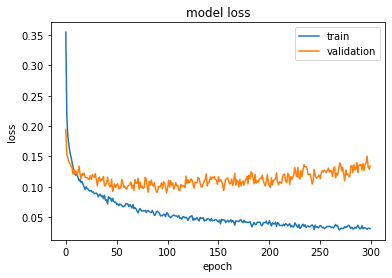

In [90]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

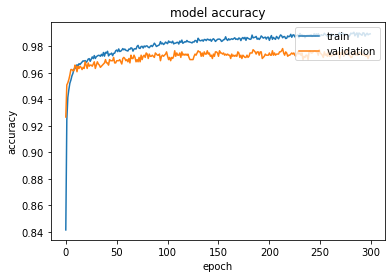

In [91]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [97]:
# Model Recall: what percentage of positive tuples are labelled as such?

y_pred = np.around(model.predict(X_test))

recall_average = recall_score(y_test,y_pred, average="micro")

print("Recall:",recall_average)

Recall: 0.978


In [87]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[2224,   38],
       [  28,  710]], dtype=int64)

<AxesSubplot:>

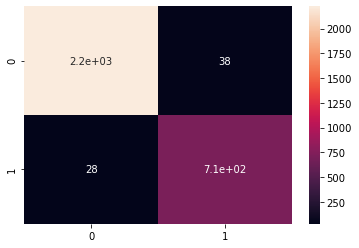

In [82]:
sns.heatmap(conf_matrix, annot=True)

In [93]:
#confusion matrix
conf_matrix2 = confusion_matrix(y_train, y_pred_train)
conf_matrix2

array([[9124,   42],
       [  27, 2806]], dtype=int64)

<AxesSubplot:>

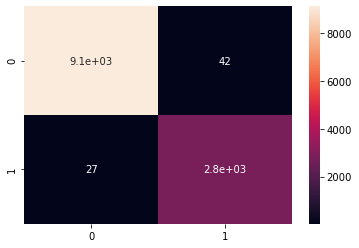

In [95]:
sns.heatmap(conf_matrix2, annot=True)

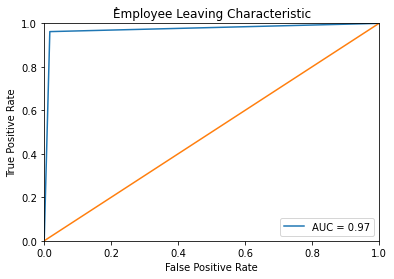

In [107]:
#roc_auc_score

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) #fpr = False Positive Rate, tpr = True Positive Rate
roc_auc = metrics.auc(fpr, tpr)

plt.title('ُEmployee Leaving Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()